In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dateutil

%matplotlib inline

<a href="https://colab.research.google.com/github/k5yi/econ2005/blob/master/notebooks/05Pandas.ipynb">
  <img src="https://img.shields.io/badge/%EC%84%9C%EA%B0%95%EA%B2%BD%EC%A0%9C-5%20Pandas-crimson?labelColor=navy&logo=googlecolab&logoClolor=crimson" align='left'/>
</a> <br>

# Pandas - PANel DAta 

- Pandas는 numpy의 확장형으로 
  - 다양한 자료형태를 동시에 사용할 수 있으며
  - 각 관찰값에 순서나 변수명 등의 index를 부여하여 사용할 수 있다.


- Pandas는 관찰값의 고유의 label을 유지하면서 수행하는 조작과 분석에 특화되어 있으며,
- 기본자료 유형들은 Numpy array에 표본의 이름과 feature의 이름을 부여한 것이다.


- Pandas 를 이용한 분석에는 numpy 관련 명령어를 자주 사용한다. <br> 
- Scipy 와 Matplotlib 도 pandas와 같이 많이 사용하는 package들이다.
- Numpy는 함수 위주로, Pandas는 거의 전적으로 method로 적용한다.


- Pandas의 기본 자료유형은 다음과 같다.
 - pd.Series: 1차원 자료
 - pd.DataFrame: 2차원 자료
 - pd.Index, pd.MultiIndex


In [2]:
pd.__version__

'1.3.5'

## Series

- pd.Series는 shape 이 $(n,2)$인 `array`, 즉 두 개의 단일 `array`로 이루어져 있다. 
- 하나는 index 혹은 label의 역할을 하며, 다른 하나는 자료 저장에 사용된다.


### Series의 생성

```python
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```


- 자료 유형이 `dict`인 경우 keys를 index로 한 `pd.Series`를 생성한다.
- ndarray의 attributes를 갖고 있으며, 이외에 다양한 [attributes와 method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)를 지원한다.

In [3]:
pd.Series(data=[1.,2], dtype="str")

0    1.0
1      2
dtype: object

In [4]:
data = list("abcdefghij")
index = range(0,20,2)
s = pd.Series(data, index, name = "SeRiEs")
print(s)

0     a
2     b
4     c
6     d
8     e
10    f
12    g
14    h
16    i
18    j
Name: SeRiEs, dtype: object


In [5]:
captital = pd.Series({'Korea':"Seoul", "Japan": "Tokyo"})
print(captital)

Korea    Seoul
Japan    Tokyo
dtype: object


In [6]:
d = dict(zip(data,range(len(data)-8)))
print(d)
print()
print(pd.Series(d))

{'a': 0, 'b': 1}

a    0
b    1
dtype: int64


### Series의 속성 attributes

`Series`는 Series의 이름인 name (string), 색인인 index (index), 자료값인 values (array)로 구성된다. <br>

`name`을 지정하면 Series를 DataFrame으로 바꿀 때 column 이름이 된다.

In [7]:
print(s.name)
print(s.index)
print(s.values)

SeRiEs
RangeIndex(start=0, stop=20, step=2)
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']


### Series의 method


#### 기초통계량

도수분포표 - 계급구간(계급값) : 빈도수
극대값, 극소값, 평균, 표준편차, 분산

```python
s.head()
s.tail()
s.value_counts()
s.max()
s.min()
s.mean()
s.std()
s.var()
s.cumsum()
s.unique()
s.nunique()
```

In [8]:
x = pd.Series(np.random.randint(1, 5, 20))

print(x.values.reshape(-1))

print('no of elements: ', len(x))
print('mean: ', x.mean())
print('std: ', x.std())
print('var: ', x.var())

freq = x.value_counts()
print(freq)

[4 1 1 2 2 2 2 2 2 4 3 2 1 1 1 4 3 3 3 2]
no of elements:  20
mean:  2.25
std:  1.019545822516343
var:  1.0394736842105263
2    8
1    5
3    4
4    3
dtype: int64


#### 정렬 sort

index나 값을 기준으로 정렬을 할 수 있다. 

```python
s.sort_index(ascending=True, axis=0, level=None)
s.sort_values(by, ascending=True, axis=0)
```

In [9]:
print(freq.sort_index(), end='\n'*2)
print(freq.sort_values(ascending=False))

1    5
2    8
3    4
4    3
dtype: int64

2    8
1    5
3    4
4    3
dtype: int64


#### difference

```python
s.shift()
s.diff()
s.pct_change()
```

In [10]:
z = x[:5]
print(z)
print(z.shift())

0    4
1    1
2    1
3    2
4    2
dtype: int32
0    NaN
1    4.0
2    1.0
3    1.0
4    2.0
dtype: float64


In [11]:
print(z.diff())
print(z.diff(2))

0    NaN
1   -3.0
2    0.0
3    1.0
4    0.0
dtype: float64
0    NaN
1    NaN
2   -3.0
3    1.0
4    1.0
dtype: float64


In [12]:
print(z.pct_change())

0     NaN
1   -0.75
2    0.00
3    1.00
4    0.00
dtype: float64


#### Pandas 자료유형

Pandas dtype | Python type | NumPy type | Usage
:--- | :--- | :--- | :---
object | str or mixed | string_, unicode_, mixed types | Text or mixed numeric and non-numeric values
int64 | int | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Integer numbers
float64 | float | float_, float16, float32, float64 | Floating point numbers
bool | bool | bool_ | True/False values
datetime64 | NA	 | Datetime64[ns] | Date and time values
timedelta[ns] | NA | NA | Differences between two datetimes
category | NA | NA | Finite list of text values


- python 자료 유형 중 categorical data type은 범주 자료를 처리할 때 유용하다.
 - 원소는 문자열이나 숫자이지만 관련 연산은 정의되지 않는다.

#### 자료유형변환

- Compatible한 자료 유형으로 바꾸거나, Series를 list나 ndarray로 변환할 수 있다.

```python
s.astype()
s.tolist()
s.to_numpy()
```

In [13]:
s = pd.Series([1,2,2,1], dtype="category")
s

0    1
1    2
2    2
3    1
dtype: category
Categories (2, int64): [1, 2]

In [14]:
s = pd.Series(np.random.randn(4).round(3), list("abcd"))

print(s)
print()
print(s.astype(bool))
print(s.astype(float))
print(s.tolist())
print(s.to_numpy())

a    0.871
b   -0.057
c    1.045
d    0.557
dtype: float64

a    True
b    True
c    True
d    True
dtype: bool
a    0.871
b   -0.057
c    1.045
d    0.557
dtype: float64
[0.871, -0.057, 1.045, 0.557]
[ 0.871 -0.057  1.045  0.557]


- `s.array`나 `s.values` 대상 series의 유형에 따라 자료유형이 결정된다.<br>
  - `array` attribute은 자료의 유형을 그대로 유지한 채 index만 제거한 PandaArray<br>
  - `values` attribute은 복합적인 자료유형의 Series나 DataFrame에 적용하면 어떤 유형이 될 지 불확실해진다.

In [15]:
print(s.array)
print(s.values)

<PandasArray>
[0.871, -0.057, 1.045, 0.557]
Length: 4, dtype: float64
[ 0.871 -0.057  1.045  0.557]


### Series.str

- Series.str은 series의 각 원소에 string의 method를 적용할 수 있게 한다.
  - Series.str.strip, Series.str.extract, Series.str.split, Series.str.len, ...

### Series의 연산

- Series의 연산은 array와 마찬가지로 element-wise operation이지만 **위치는 index를 기준**으로 한다.

- 연산을 하는 series에 해당 index가 존재하지 않으면 np.nan으로 취급한다.

```python
+, s1.add(other, level=None, fill_value=None, axis=0)
-, s1.substract(s2)
*, s1.multiply(s2)
/, s1.divide(s2)
```

In [16]:
x = pd.Series([1, 2, 3], list('cba'))
y = pd.Series([3, 2, 1], list('bca'))

print(x+y)

a    4
b    5
c    3
dtype: int64


- 공통적인 index가 없는 Series에 연산을 적용하면 모든 결과값은 NaN이 된다.

- Pandas에서 모든 연산은 index로 정렬을 한 뒤 이루어진다.
- Series와 DataFrame에서는 broadcasting이 적용되지 않는다.
- Series와 DataFrame의 단순한 연산에는 array를 사용한다.


- 다음 예제에서와 같이 더하기는 같은 index에만 적용되므로 각 애완동물의 수를 구할 수 없다.

In [17]:
idx1 = ["cat", "dog", "anaconda"]
idx2 = ["rabbit", "hamster", "cat"]

tower1 = pd.Series([1, 2, 3], idx1)
tower2 = pd.Series([3, 2, 1], idx2)

tower1 + tower2

anaconda    NaN
cat         2.0
dog         NaN
hamster     NaN
rabbit      NaN
dtype: float64

- 주어진 순서대로 연산을 하려면 index를 제거하고 사용한다.

In [18]:
x = pd.Series([1, 2, 3], list('cba'))
z = pd.Series([2, 1, 3], list('abd'))

print(x/z)
print(x/z.values)
print(x.values/z)

a    1.5
b    2.0
c    NaN
d    NaN
dtype: float64
c    0.5
b    2.0
a    1.0
dtype: float64
a    0.5
b    2.0
d    1.0
dtype: float64


### map & apply

```
pd.Series.map(func)
pd.Series.apply(func)
```

- map은 개별 원소에 대해 변환을 적용하고 apply는 열에 대해 함수 `func`을 적용한다.
- 따라서 map은 `pd.Series`, apply는 DataFrame에 주로 사용한다.


```python
Series.map(arg)
DataFrame.apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
```

- `map`의 `arg`에는 dict나 함수 같은 mapping correspondence를 사용할 수 있다.
- `apply`는 DataFrame의 row/column에 사용하며 여기서는 Series를 하나의 column으로 취급하는 것이다.   

In [19]:
s = pd.Series({"temperature in Celsius": np.random.randint(-12,-7,6)})

C_to_F = lambda x: (x * 9/5 + 32).round(1)

print(s)
print()
print(' temperature in Fahrenheit: ', s.map(C_to_F))

temperature in Celsius    [-12, -9, -9, -11, -12, -11]
dtype: object

 temperature in Fahrenheit:  temperature in Celsius    [10.4, 15.8, 15.8, 12.2, 10.4, 12.2]
dtype: object


In [20]:
alphabet = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower())
num = range(len(alphabet))
trans = dict(zip(alphabet, num))
print(trans)

s = pd.Series(list("Be as proud of Sogang As Sogang is proud of you".lower().replace(" ",'')))

print(s.head(5))
print(s.map(trans).head(5))

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
0    b
1    e
2    a
3    s
4    p
dtype: object
0     1
1     4
2     0
3    18
4    15
dtype: int64


- 하나의 열에 함수를 적용할 때는 map과 apply 둘 모두 사용할 수 있다.
- 연산에 여러 개의 열이 필요할 때는 apply를 사용해야 한다. 

In [21]:
print(x.head())
print(x.map(lambda x: x**2 - 10).head())
print(x.apply(lambda x: x**2 - 10).head())

c    1
b    2
a    3
dtype: int64
c   -9
b   -6
a   -1
dtype: int64
c   -9
b   -6
a   -1
dtype: int64


### Series의 결합

```python
s1.append(s2)
pd.concat([s1,s2,...,sn], axis=0, join="outer", ignore_index=False)
```


- append는 첫 축, 즉 0 축 방향으로 쌓아올린다.
- append는 대부분의 container 유형에 정의된다. List와는 다르게 객체를 수정하지 않는다.
- concat는 가능한 모든 축을 따라 series를 합칠 수 있다.<br>

In [22]:
x = [1,2]
xx = x.append(4)
print(xx)

None


In [23]:
s1 = pd.Series(np.random.randn(4), list("abcd"))
s2 = pd.Series(range(4), list("cdef"))

s = s1.append(s2)
print(s1)
print()
print(s)

a   -0.659896
b   -0.582906
c    0.026391
d   -0.944167
dtype: float64

a   -0.659896
b   -0.582906
c    0.026391
d   -0.944167
c    0.000000
d    1.000000
e    2.000000
f    3.000000
dtype: float64


- pd.concat는 일반적인 결합방법으로 결합방향, 결합할 때 index의 처리방법 등을 지정할 수 있다.

- `join=inner`(intersection)는 모든 Series에 공통적으로 포함된 index의 값만 결합하고 ,<br>
`outer`(union)는 모든 index를 전부 고려한다.

In [24]:
print(pd.concat([s1,s2])) # axis=0
print()
print(pd.concat([s1,s2], axis=1, join='inner'))
print()
print(pd.concat([s1,s2], axis=1, join='outer'))

a   -0.659896
b   -0.582906
c    0.026391
d   -0.944167
c    0.000000
d    1.000000
e    2.000000
f    3.000000
dtype: float64

          0  1
c  0.026391  0
d -0.944167  1

          0    1
a -0.659896  NaN
b -0.582906  NaN
c  0.026391  0.0
d -0.944167  1.0
e       NaN  2.0
f       NaN  3.0


### Missing value의 처리

#### missing value의 확인과 삭제

- missing value의 확인은 `s.isna()`, 삭제는 `s.dropna()`를 사용한다.

```python
pd.Series.isna()
pd.Series.dropna(inplace=False)
```

- `s.notna()`은 NaN이 아닌 값에 True로 하는 Series를 만든다.

In [25]:
na = np.random.RandomState(42).randint(0, len(s), 3)
s_with_nan = s.copy()
s_with_nan.index = range(len(s_with_nan))
s_with_nan[na] = np.nan

In [26]:
print(s_with_nan)
print(s_with_nan.isna())

0   -0.659896
1   -0.582906
2    0.026391
3         NaN
4         NaN
5    1.000000
6         NaN
7    3.000000
dtype: float64
0    False
1    False
2    False
3     True
4     True
5    False
6     True
7    False
dtype: bool


In [27]:
# with no copy
s_with_nan.fillna(-999, inplace=True)
print(s_with_nan)

0     -0.659896
1     -0.582906
2      0.026391
3   -999.000000
4   -999.000000
5      1.000000
6   -999.000000
7      3.000000
dtype: float64


In [28]:
print(s1.shift(2))
print(s1.shift(2).dropna())

a         NaN
b         NaN
c   -0.659896
d   -0.582906
dtype: float64
c   -0.659896
d   -0.582906
dtype: float64


#### imputation

- NaN을 지정한 값으로 변환

```python
pd.Series.fillna(value=None, method=None, axis=None, inplace=False, limit=None)
```

- method: 'backfill'/'bfill', 'pad'/'ffill', None, default None<br>
- limit: 연속적으로 변환하는 횟수로 시계열자료에서 주로 사용


### indexing 과 slicing

- `pd.Series`의 indexing에는 index를 사용할 수 있다. <br>
- 기본적인 indexing과 slicing 방법은 `ndarray`와 동일하다.


- `pd.Series[index]`는 `pd.Series.loc[index]` 나 `pd.Series.iloc[integer]` 와 동일하다.


- 대괄호 안의 단순한 index는 원소값을, 대괄호 안에 list를 사용하면 결과는 Series가 된다. (`s[0]` vs. `s[[0]]`)


- 순서를 이용할 경우에는 `pd.Series.iloc[]`로 정수 index를 사용한다.<br>
- `s.iloc[]`는 np.array의 slicing과 마찬가지로 마지막 index를 포함하지 않는다.<br>
- 반면 `s.loc[start, stop, step]`는 마지막 index를 포함한다.<br>
Partial slicing을 적용하려면 index가 정렬되어 있어야 한다.

In [29]:
x = pd.Series(["cat", "dog", "rabbit", "hamster", "parrot", "chameleon"], index = list("mypets"))

In [30]:
print(x.iloc[2])
print(x.loc["p"])
print(x[[True, True, False, False, False, True]])

rabbit
rabbit
m          cat
y          dog
s    chameleon
dtype: object


In [31]:
index = [True if len(a) > 3 else False for a in x]
x[index]

p       rabbit
e      hamster
t       parrot
s    chameleon
dtype: object

### Hierarchical indexing ([MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html))

- Pandas의 장점 중 하나는 여러 개의 index를 동시에 사용할 수 있다는 점이다. 
- Pandas 0.24까지 세 개의 축을 가진 `pd.Panel` 객체를 지원하였지만 이후 MultiIndex로 대체하었다.

```python
pd.MultiIndex(levels=None, codes=None)

# from list of arrays
pd.MultiIndex.from_arrays(arrays, sortorder=None, names=None) 

# from tuples
pd.MultiIndex.from_tuples(tuples, sortorder=None, names=None)

# Cartesian product of single indices
pd.MultiIndex.from_product(iterables, sortorder=None, names=None) 

pd.MultiIndex.from_frame(df)
```

In [32]:
arrays = [['2015', '2015', '2015', '2016', '2016', '2016'],
         ["Bob", "Cam", "Dan", "Ari", "Bob", "Cam"]]

tuples = tuple(zip(*arrays))  # list() also works
multi_index = pd.MultiIndex.from_tuples(tuples, names = ["year", "name"])

s = pd.Series(np.random.RandomState(0).randint(25,40,6), 
              index = multi_index, name = "weeks")

print(s)

year  name
2015  Bob     37
      Cam     30
      Dan     25
2016  Ari     28
      Bob     36
      Cam     28
Name: weeks, dtype: int32


In [33]:
arrays = [['2015', '2016'], ["Ari", "Bob", "Cam", "Dan"]]
m_idx = pd.MultiIndex.from_product(arrays)
m_idx

MultiIndex([('2015', 'Ari'),
            ('2015', 'Bob'),
            ('2015', 'Cam'),
            ('2015', 'Dan'),
            ('2016', 'Ari'),
            ('2016', 'Bob'),
            ('2016', 'Cam'),
            ('2016', 'Dan')],
           )

- MultiIndex에도 일반적인 indexing과 slicing 방법을 적용할 수 있다.
- MultiIndex 역시 Partial slicing을 적용하려면 index가 정렬되어 있어야 한다.

In [34]:
print("s['2015'] \n", s['2015'], "\n")
print("s['2015':'2016] \n", s['2015':'2016'], "\n")
print("s['2015', 'Bob'] \n", s['2015', 'Bob'], "\n")
print("s[:, 'Bob'] \n", s[:, 'Bob'], "\n")
print("s[s >35] \n", s[s >35])

s['2015'] 
 name
Bob    37
Cam    30
Dan    25
Name: weeks, dtype: int32 

s['2015':'2016] 
 year  name
2015  Bob     37
      Cam     30
      Dan     25
2016  Ari     28
      Bob     36
      Cam     28
Name: weeks, dtype: int32 

s['2015', 'Bob'] 
 37 

s[:, 'Bob'] 
 year
2015    37
2016    36
Name: weeks, dtype: int32 

s[s >35] 
 year  name
2015  Bob     37
2016  Bob     36
Name: weeks, dtype: int32


- MultiIndex의 slicing으로 많이 사용하는 방법은 `slice()`와 `pd.IndexSlice[]`이다. Series에선 특별한 장점이 없지만 여러 column을 갖는 DataFrame에서 읽기 쉽게 다른 유형의 자료와 비슷한 방법으로 slicing을 할 수 있게 해준다.

In [35]:
idx = pd.IndexSlice

print(s.loc[slice('2015', 'Ari')]) # s.loc[slice('2015', 'Ari'), :]
print(s.loc[idx['2015':'2016', 'Bob']])

year  name
2015  Bob     37
      Cam     30
      Dan     25
2016  Ari     28
      Bob     36
      Cam     28
Name: weeks, dtype: int32
year  name
2015  Bob     37
2016  Bob     36
Name: weeks, dtype: int32


### hierarchical index 정리

```python
MultiIndex.reorder_levels(order, axis=0) 
s.reorder_levels(order, axis=0) 

MultiIndex.swaplevel(i=-2, j=-1)
s.swaplevel(i=-2, j=-1, axis=0) 

MultiIndex.droplevel(level=0)
s.droplevel(level, axis=0)
```

In [36]:
print(s[:5])
print()
print(s.reorder_levels((1,0)).head())
print()
print(s.swaplevel().head())

year  name
2015  Bob     37
      Cam     30
      Dan     25
2016  Ari     28
      Bob     36
Name: weeks, dtype: int32

name  year
Bob   2015    37
Cam   2015    30
Dan   2015    25
Ari   2016    28
Bob   2016    36
Name: weeks, dtype: int32

name  year
Bob   2015    37
Cam   2015    30
Dan   2015    25
Ari   2016    28
Bob   2016    36
Name: weeks, dtype: int32


### 수정 update

- `s.replace()`는 해당값을 주어진 값으로, `s.where()`는 해당 원소에 대한 조건이 거짓일 경우 주어진 값으로 바꾼다.

```python
Series.replace(to_replace=None, value=None, inplace=False)
Series.where(cond, other=nan, inplace=False)
```

- s1.where(cond, s2) 은 np.where(cond, s1, s2) 와 유사하다.

In [37]:
print(x[:3].replace({"cat": 'tiger'}))
print()
print(x[:3].replace(to_replace="dog", value='wolf'))

m     tiger
y       dog
p    rabbit
dtype: object

m       cat
y      wolf
p    rabbit
dtype: object


In [38]:
x.where(x.map(lambda x: len(x)) <= 6, None) 

m       cat
y       dog
p    rabbit
e      None
t    parrot
s      None
dtype: object

객체 복사와 update: view vs. copy

- Python에선 변수의 이름은 pointer 역할이다. <br>
- Pandas의 경우 연산의 종류에 따라 새로운 객체를 만들기도 하고, 어떤 경우에는 기존의 객체에서 일부분을 보여주는 역할을 하기도 한다. <br>
- 변수를 update할 때는 이 두 유형을 구분해야 한다. <br>
- 이와 관련하여 문제가 발생할 여지가 있을 때는 `SettingWithCopyWarning`를 보여주기도 하지만 아무런 경고 없이 진행되는 경우도 많다.

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/modifying.png" width=600>

In [39]:
x = pd.Series(1)
y = pd.Series(x)            # y = x
z = pd.Series(x, copy=True) # z = x.copy()

print(f"x = {x[0]}, y = {y[0]}, z = {z[0]}")

x[0] = 2

print(f"x = {x[0]}, y = {y[0]}, z = {z[0]}")

x = 1, y = 1, z = 1
x = 2, y = 2, z = 1


In [40]:
x = pd.Series(1)
y = x + 0                   # y = x
z = pd.Series(x, copy=True) # z = x.copy()

print(f"x = {x[0]}, y = {y[0]}, z = {z[0]}")

x[0] = 2

print(f"x = {x[0]}, y = {y[0]}, z = {z[0]}")

x = 1, y = 1, z = 1
x = 2, y = 1, z = 1


### Series.plot

- Series나  DataFrame은 plot method가 정의되어 있어 '알아서' plot을 만들어 준다.
- 만들어진 그림판 위어서 matplotlib의 도구를 사용해서 추가작업을 할 수 있다.

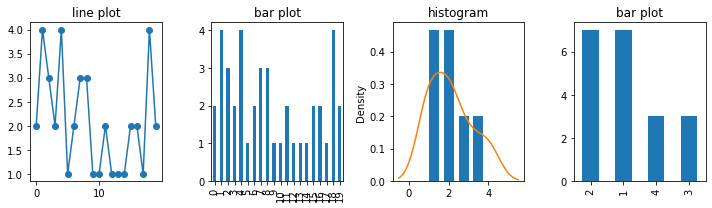

In [41]:
x = pd.Series(np.random.randint(1, 5, 20))
freq = x.value_counts()

fig, ax = plt.subplots(1, 4, figsize=(10,3))

x.plot(ax=ax[0], marker='o', title='line plot')
x.plot.bar(ax=ax[1], title='bar plot')
x.plot.hist(ax=ax[2], bins=4, width=.5, title='histogram', density=True)
x.plot.kde(ax=ax[2])
freq.plot.bar(ax=ax[3], title='bar plot')
plt.tight_layout()

#### bar plot

- Bar plot은 자료를 category 로 해석하므로 주어진 label 이나 `range()`로 x label의 순서와 값을 정한다.

#### Histogram

- Histogram의 bins (bin size)는 갯수나 경계값으로 지정한다. 
- 갯수로 지정하면 입력자료의 범위를 같은 너비로 나누어 사용한다.
- 각 막대는 경계에서 시작하기 때문에 label과 정확히 정렬하지 않을 수 있다.

In [42]:
pd.cut(x, 4).value_counts().sort_index()

(0.997, 1.75]    7
(1.75, 2.5]      7
(2.5, 3.25]      3
(3.25, 4.0]      3
dtype: int64

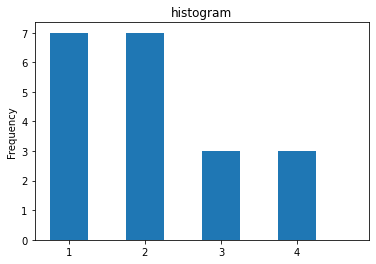

In [43]:
x.plot.hist(bins=np.arange(.75, 5.5, 1), width=.5, title='histogram', density=False)
plt.gca().set_xticks(range(1,5));

## DataFrame

- `pd.DataFrame`은 2차원 ndarray와 동일한 형태로 2차원 표 형식의 자료유형이다.
- List, tuple, dict와 비교해 계산 속도와 access의 편의성에 장점이 있다.


- `pd.Series`는 변수 하나로 이루어진 자료를 정리하는데 사용하며, `pd.DataFrame`는 여러 개의 `pd.Series`를 하나로 모은 자료형태이다.
- `pd.DataFrame`의 각 열은 개별 변수 `pd.Series`에 해당한다.

### DataFrame의 생성

```python
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

- `list`, `np.array`, `dict`를 사용하여 만들거나 `pd.Series`를 묶어서 만들기도 한다.


- DataFrame과 관련된 연산의 기준 축은 column이다. 
- 일반적으로 자료를 정리할 때 관찰값을 행, 변수들을 열로 정한다.

In [44]:
df0 = pd.DataFrame([])
print(df0)

Empty DataFrame
Columns: []
Index: []


In [45]:
df1 = pd.DataFrame([['c', 13, 'omnivore'], ['d', 18, 'carnivore']])
df1

,0,1,2
0,c,13,omnivore
1,d,18,carnivore


- `index`(row index)와 `columns`(column index)는 `df.index`와 `df.columns`로 확인하고 수정할 수 있다.

In [46]:
df1.index = ["cat", "dog"]
df1.columns = ['code', 'life span', 'diet']
print(df1)

    code  life span       diet
cat    c         13   omnivore
dog    d         18  carnivore


In [47]:
df2 = pd.DataFrame(np.array([['c', 13, 'cat'], ['d', 18, 'dog']]),
                   index = ["Adam", "Belle"],
                   columns=['code', 'life span', 'diet'])
print(df2)

      code life span diet
Adam     c        13  cat
Belle    d        18  dog


In [48]:
df2 = pd.DataFrame({'code':['c', 'd'], 'life span':[13, 18], 'diet':['omnivore', 'carnivore']},
                   index = ["Adam", "Belle"])

In [49]:
x = np.array([['c', 13, 'omnivore'], ['d', 18, 'carnivore']])
s0 = pd.Series(x[:,0])
s1 = pd.Series(x[:,1])
s2 = pd.Series(x[:,2])

print(pd.DataFrame({'code':s0, 'life span':s1, 'diet':s2}))

  code life span       diet
0    c        13   omnivore
1    d        18  carnivore


In [50]:
index = ['cat', 'dog']
s0 = pd.Series(x[:,0], name='code', index=index)
s1 = pd.Series(x[:,1], name='life span', index=index)
s2 = pd.Series(x[:,2], name='diet', index=index)

print(pd.concat([s0,s1,s2], axis=1))

    code life span       diet
cat    c        13   omnivore
dog    d        18  carnivore


### indexing과 slicing

- Pandas의 index는 행과 열의 위치나 이름 모두 사용 가능

- `pd.DataFrame`의 원소는 행과 열로 구분하므로 index operator `[]` 안에는 comma로 구분한 두 개의 index가 필요
 - `df.loc`는 index와 열의 이름을 직접 사용
 - 둘 이상의 행과 열을 선택할 때는 list를 사용
 - `df.iloc[index]`나 `df.loc[index]`를 이용하여 구분
 - `df.iloc`는 행과 열의 위치를 정수로 표시
 - `df.iloc`는 series의 slicing과 마찬가지로 마지막 index를 포함하지 않는다.

In [51]:
df = pd.DataFrame(np.random.RandomState(0).randint(0,3,3*5).reshape(3,5),
                  columns = ["cat", "dog", "rabbit", "hamster", "parrot"])

print(df)

   cat  dog  rabbit  hamster  parrot
0    0    1       0        1       1
1    2    0       2        0       0
2    0    2       1        2       2


In [52]:
print(df.iloc[:1, 2:4])  # df3.iloc[0, 2:4] 은 series
print()
print(df.iloc[:1, 2:])
print()
print(df.loc[:1, "rabbit":"parrot"])

   rabbit  hamster
0       0        1

   rabbit  hamster  parrot
0       0        1       1

   rabbit  hamster  parrot
0       0        1       1
1       2        0       0


- `[row, col]`을 기본으로 다음과 같은 예외들이 있다.

In [53]:
print(df.loc[[0, 2]])        # loc에 하나의 list는 index로 해석
print()
print(df[["cat","parrot"]])  # 괄호만 사용하면 column으로 해석
print()
print(df.cat)                # attribute를 이용, column 이름에 space가 없어야 한다.
print()
print(df[df.cat >= 1])       # boolean index

   cat  dog  rabbit  hamster  parrot
0    0    1       0        1       1
2    0    2       1        2       2

   cat  parrot
0    0       1
1    2       0
2    0       2

0    0
1    2
2    0
Name: cat, dtype: int32

   cat  dog  rabbit  hamster  parrot
1    2    0       2        0       0


### Output format - Series or DataFrame

- index operator `[]`안에 (하나의) 열의 이름을 사용하면 해당 열을 slicing하여 `pd.Series`을 return한다.
- `df.col_name` 역시 같은 작용을 한다.


- index operator `[]`안에 list를 사용하면 DataFrame 유형이 된다.

### filter와 query

- 두 method는 row나 column의 index에만 적용
- filter는 단순한 slicing, query는 조건을 적용할 수 있다.

```python
DataFrame.filter(items=None, like=None, regex=None, axis=None)
DataFrame.query(expr, inplace=False, **kwargs)
```

- filter
 - 입력한 item, like, regex의 조건을 만족하는 index나 coulumn label로 자료를 추출한다.


- query는 조건을 이용하여 boolean index를 생성하여 자료를 추출한다.
 - `expr`은 조건문의 표현이며 'string'으로 만들어 사용한다.
 - 조건에 변수를 사용할 경우에는 `@`를 붙여 사용한다.

### 새로운 행/열의 추가, 그리고 update

- 새로운 행이나 열을 추가할 때는 `df1.append(row)`나 `pd.concat([df1,df2])`를 사용한다.


- 열의 경우에는 `df[new_col] = values`와 같이 update 형식으로 새로운 열을 추가할 수 있다.
- Documenet에는 `df.loc[new_col] = values`와 같이 가능하면 명시적인 방법을 사용할 것을 권한다. 

In [54]:
df.loc[:,"silver_fox"] = [0,0,1]
print(df)

   cat  dog  rabbit  hamster  parrot  silver_fox
0    0    1       0        1       1           0
1    2    0       2        0       0           0
2    0    2       1        2       2           1


In [55]:
df["gardian"] = ["Adam", "Betty", "Carol"]
print(df)

   cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           1   Carol


- update를 할 경우 view와 copy를 확실히 구분할 자신이 없다면 명시적으로 처리한다.

In [56]:
duplicate1 = df.copy()
duplicate2 = df.copy()

In [57]:
print("duplicate1 before update: \n", duplicate1)

view = duplicate1.iloc[:,:]
view.loc[duplicate1.silver_fox >= 1, "silver_fox"] = 2
print()
print("updated view: \n", view)
print()
print("duplicate1 after updating view: \n", duplicate1)

duplicate1 before update: 
    cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           1   Carol

updated view: 
    cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           2   Carol

duplicate1 after updating view: 
    cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           2   Carol


In [58]:
copy = duplicate2.copy()
copy.loc[copy.silver_fox >= 1, "silver_fox"] = 2

print("updated copy: \n", copy)
print()
print("duplicate2 after updating its copy: \n", duplicate2)

updated copy: 
    cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           2   Carol

duplicate2 after updating its copy: 
    cat  dog  rabbit  hamster  parrot  silver_fox gardian
0    0    1       0        1       1           0    Adam
1    2    0       2        0       0           0   Betty
2    0    2       1        2       2           1   Carol


#### Deepcopy

- Mutable object가 포함된 DataFrame을 복사하여 여러 작업에 사용하는 것은 가급적 피하는 것이 좋다.<br>
- DataFrame의 경우 `copy.deepcopy()`역시 전체 구조를 온전히 복사하지 못하므로 다음과 같이 복사한다.

```python
pd.DataFrame(columns = df.columns, data = copy.deepcopy(df.values))
```

- 기초 통계량이나 기타 method들은 Series와 비슷하게 사용할 수 있다.


- 다만 기준이 되는 축을 지정해 주어야 한다. 
- Pandas의 default는 세로방향, axis=0, 즉 각 열을 따라 위치한 원소들이다.

In [59]:
df.iloc[:,:-1].max()

cat           2
dog           2
rabbit        2
hamster       2
parrot        2
silver_fox    1
dtype: int64

### Index 정리

- Default index는 `np.arange`이다. 
- 여러 DataFrame을 결합할 때는 기존 index를 유지할 수도, 새로 만들 수 있다.

```
DataFrame.reset_index(level=None, drop=False, inplace=False)
```

- 열의 값을 index로 사용할 수도 있다.

```
DataFrame.set_index(keys, drop=True, append=False, inplace=False)
```

In [60]:
df.index = list("bca")
print(df)

   cat  dog  rabbit  hamster  parrot  silver_fox gardian
b    0    1       0        1       1           0    Adam
c    2    0       2        0       0           0   Betty
a    0    2       1        2       2           1   Carol


In [61]:
print(df.reset_index())
print()
df = df.set_index("gardian")
print(df)

  index  cat  dog  rabbit  hamster  parrot  silver_fox gardian
0     b    0    1       0        1       1           0    Adam
1     c    2    0       2        0       0           0   Betty
2     a    0    2       1        2       2           1   Carol

         cat  dog  rabbit  hamster  parrot  silver_fox
gardian                                               
Adam       0    1       0        1       1           0
Betty      2    0       2        0       0           0
Carol      0    2       1        2       2           1


In [62]:
df.index.name  # df.index.names

'gardian'

In [63]:
print(df.sort_index(ascending=False))
print()
print(df.sort_values(by="parrot"))

         cat  dog  rabbit  hamster  parrot  silver_fox
gardian                                               
Carol      0    2       1        2       2           1
Betty      2    0       2        0       0           0
Adam       0    1       0        1       1           0

         cat  dog  rabbit  hamster  parrot  silver_fox
gardian                                               
Betty      2    0       2        0       0           0
Adam       0    1       0        1       1           0
Carol      0    2       1        2       2           1


### columns to index

- `df.set_index()`는 column의 값으로 기존의 index로 대체한다.
- column을 MultiIndex 중의 하나로 사용하고 싶을 때는 `stack`을 사용할 수 있다.

```
df.stack(level=-1, dropna=True)
```

- 반대로 `df.unstack()`는 index를 column으로 사용할 수 있게 한다.

In [64]:
print(df)
print()
stacked_df = df.stack()
print(stacked_df)

         cat  dog  rabbit  hamster  parrot  silver_fox
gardian                                               
Adam       0    1       0        1       1           0
Betty      2    0       2        0       0           0
Carol      0    2       1        2       2           1

gardian            
Adam     cat           0
         dog           1
         rabbit        0
         hamster       1
         parrot        1
         silver_fox    0
Betty    cat           2
         dog           0
         rabbit        2
         hamster       0
         parrot        0
         silver_fox    0
Carol    cat           0
         dog           2
         rabbit        1
         hamster       2
         parrot        2
         silver_fox    1
dtype: int64


In [65]:
stacked_df.unstack()

,cat,dog,rabbit,hamster,parrot,silver_fox
gardian,,,,,,
Adam,0,1,0,1,1,0
Betty,2,0,2,0,0,0
Carol,0,2,1,2,2,1


### Indexing and Slicing

- `MultiIndex` 여부에 관계없이 `df.iloc[]`는 순서에만 고려한다. 즉 행과 열에 해당하는 2개의 수만 지정한다.
- MultiIndex에 `df.loc[]`를 적용할 때는 index를 순서대로 정리한 tuple을 이용한다.


- Slicing한 결과물이 하나의 행이나 열인 경우 Series로 출력한다.<br>
- DataFrame이 필요하다면 `Series.to_frame()`으로 변환한다.

In [66]:
panel = pd.DataFrame(np.random.RandomState(0).randn(6,4), index = multi_index, columns = list("abcd"))
print(panel)
print()
print(panel.loc[("2015","Cam"),:])
print()
print(panel.loc[("2015","Cam"),:].to_frame())

                  a         b         c         d
year name                                        
2015 Bob   1.764052  0.400157  0.978738  2.240893
     Cam   1.867558 -0.977278  0.950088 -0.151357
     Dan  -0.103219  0.410599  0.144044  1.454274
2016 Ari   0.761038  0.121675  0.443863  0.333674
     Bob   1.494079 -0.205158  0.313068 -0.854096
     Cam  -2.552990  0.653619  0.864436 -0.742165

a    1.867558
b   -0.977278
c    0.950088
d   -0.151357
Name: (2015, Cam), dtype: float64

       2015
        Cam
a  1.867558
b -0.977278
c  0.950088
d -0.151357


#### `slice`

- `df.loc[]`에는 `slice()` 혹은 `pd.IndexSlice`를 사용할 수 있다.<br>

```
slice(start, stop, step)
```

- Slicing에선 순서상 나중 것이 앞에 올 수 없기 때문에, MultiIndex를 slicing할 때 index의 '순서'에 주의한다.
- 따라서 slice를 사용할 때는 `df.sort_index(level=None)`를 먼저 적용할 필요가 있다.


- `slice(None)`은 wild card 역할을 한다.

In [67]:
print(panel.loc[(("2015", "2016"), ("Ari","Bob")),:])
print()
print(panel.loc[(slice(None), slice("Ari","Bob")),:])
print()
print(panel.loc[(slice(None), slice("Ari","Bob")) , slice("a","d", 2)])

                  a         b         c         d
year name                                        
2015 Bob   1.764052  0.400157  0.978738  2.240893
2016 Ari   0.761038  0.121675  0.443863  0.333674
     Bob   1.494079 -0.205158  0.313068 -0.854096

                  a         b         c         d
year name                                        
2015 Bob   1.764052  0.400157  0.978738  2.240893
2016 Ari   0.761038  0.121675  0.443863  0.333674
     Bob   1.494079 -0.205158  0.313068 -0.854096

                  a         c
year name                    
2015 Bob   1.764052  0.978738
2016 Ari   0.761038  0.443863
     Bob   1.494079  0.313068


- `pd.IndexSlice[]`는 slice를 대괄호 문법(`[start,stop,step]`)과 같이 직관적으로 시용할 수 있게 해준다.
- `pd.IndexSlice`는 보통 변수로 지정하여 사용한다.

In [68]:
idx = pd.IndexSlice
panel.loc[(idx[:], idx["Dan"]),:]

,,a,b,c,d
year,name,,,,
2015,Dan,-0.103219,0.410599,0.144044,1.454274


- column 역시 hierarchical indexing이 가능하지만 pivot이나 unstack을 사용해 간접적으로 만들어야 한다.

#### function and method

function and method | description | function and method | description
:--|:-- | :-- | :--
dtype() | data type | size()|	group sizes 
head(n=5) | display the first n rows | tail(n=5) | display the last n rows
count()|	count of group | sum() |	sum of group values 
abs() | Absolute value | prod() | prod of group values
mean()|	mean of groups | std()|	Standard deviation of groups 
var()|	variance of groups | mode()| Mode
mad()| Mean absolute deviation | median() | Arithmetic median of values
skew() | Sample skewness | kurt() | Sample kurtosis
cumsum()| cumulative sum | cumprod() | cumulative product
rank() | the rank of values within each group | sem()|	Standard error of the mean of groups 
first()|	initial period of time series | last()|	last period of time series
nth()|	Take nth value, or a subset if n is a list |quantile()| sample quantile (value at %)
min()| Compute min of group values | max()| Compute max of group values
cummin() | cumulative min of group values  | cummax() | cumulative max of group values

## DataFrame 의 결합

```python
df1.append(df2, sort=)
pd.concat([s1,s2,...,sn], axis=0, join="outer", ignore_index=False, sort=)     
```

### join

- join keyword는 결합하면서 남겨야할 index(axis=1 일 때)나 column(axis=0 일 때)을 결정한다.

In [69]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])

In [70]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [71]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [72]:
pd.concat([df1, df3], join="outer")

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


### 수직 합치기: append, concat

- DataFrame을 axis=0 으로 결합한다.
같은 columns 이름을 공유하지 않으면 NaN으로 처리한다.

```python
df1.append(df1)
pd.concat([df1, df2], axis=0)
```

In [73]:
a = pd.DataFrame([1,2])
b = pd.DataFrame([[1,2],[3,4]])

a.append(b)
pd.concat([a,b])

,0,1
0,1,NaN
1,2,NaN
0,1,2.0
1,3,4.0


### 수평 합치기: concat, merge

- 동일한 index 혹은 index를 기준으로 여러개의 열을 결합

In [74]:
print(pd.concat([a,b], 1))
print(pd.merge(a, b, how='outer'))

   0  0  1
0  1  1  2
1  2  3  4
   0    1
0  1  2.0
1  2  NaN
2  3  4.0


C:\Users\K5\AppData\Local\Temp/ipykernel_172724/2780993072.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  print(pd.concat([a,b], 1))


#### 같은 이름과 유형의 열을 기준으로 합치기: merge

- 이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다.
- key index, key colum


```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)
df.merge(right, how='inner', ...)         
```
    - 왼쪽 DataFrame의 index를 기준: left_index=True, right_index=True, how='left'
    - 오른쪽 DataFrame의 index를 기준: left_index=True, right_index=True, how='right'
    - 공통된 index만 고려: left_index=True, right_index=True, how='inner'
    - 모든 index를 고려: left_index=True, right_index=True, how='outer'

- key는 같은 이름을 갖는 모든 column이며 일부를 사용하려면 on을 지정한다.
- key가 두 DataFrame에서 다르다면 left_on='col_left', right_on="col_right"


    - 왼쪽 DataFrame의 column을 기준: how='left', on='col_name'
    - 오른쪽 DataFrame의 column을 기준: how='right', on='col_name'


- column을 index와 같이 취급하여 결합
- 결합하는 DataFrame이 동일한 column 이름과 자료 유형을 갖는다.


### `pd.DataFrame`의 연결

`pd.DataFrame`은 merge, join, concaternate로 결합이 가능하다.

`pandas.concat([obj1, obj2, ...], axis=0, join='outer')`

## 조건부 통계량과 groupby()

- 자료의 일부를 추출하거나 일부에 연산을 적용할 때는 `boolean index`, `df.filter()`, `np.where()`, `df.query()`를 많이 사용한다.


- 주어진 자료에서 원하는 조건부 통계량을 구할 때는 groupby와 pivot_table을 사용한다. EDA의 가장 중요한 tool 중 하나로 다음의 단계로 이루어진다.<br>


1. 객체의 분할 splitting the Object
2. 분할한 각 group에 원하는 함수 적용 applying a function 
 - aggregation - summary statistic, group에 적용할 수 있는 일반적인 function
 - transformation - group-specific operation
 - filteration - discarding the data with some conditions
3. 결과를 통합 combine

### Groupby

1. Sort by keys
2. apply a function to each group
3. combine the results

In [75]:
s = pd.Series(np.random.RandomState(42).randn(30), index=list('abc')*10)
print(s.groupby(by=s.index).mean())

a    0.251871
b   -0.482900
c   -0.333411
dtype: float64


- Titanic 자료를 예제로 사용한다.

- 분석 전에 자료의 기초 정보를 확인한다.
 - 지나치게 크거나 작은 값이 있는지 확인한다.
 - missing value를 확인한다.
 - 특정 조건을 만족하는 관찰값을 확인한다.

In [76]:
titanic_processed = 'https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/titanic_processed.csv'
df = pd.read_csv(titanic_processed)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [77]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1305 non-null   int64  
 1   pclass    1305 non-null   int64  
 2   sex       1305 non-null   object 
 3   age       1305 non-null   float64
 4   sibsp     1305 non-null   int64  
 5   parch     1305 non-null   int64  
 6   fare      1305 non-null   float64
 7   embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,0.381609,2.297318,29.387101,0.500383,0.386207,33.464153
std,0.485968,0.836587,13.139617,1.042888,0.866624,51.683545
min,0.000000,1.000000,0.166700,0.000000,0.000000,3.170800
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,35.500000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


자료에서 나이가 가장 많은 사람의 자료를 확인해보자.

idxmax는 np.argmax와 동일한 기능을 한다. DataFrame의 argmax method는 0.21.0에서 deprecated 되었다.

In [78]:
eldest = df["age"].idxmax()

print("the index of the eldest passenger :", eldest, "\n")
print(df.iloc[eldest])

the index of the eldest passenger : 14 

survived       1
pclass         1
sex         male
age         80.0
sibsp          0
parch          0
fare        30.0
embarked       S
Name: 14, dtype: object


나이의 도수분포표를 만들어 본다.

In [79]:
pd.cut(df["age"], 10).value_counts().sort_index()

(0.0869, 8.15]       80
(8.15, 16.133]       62
(16.133, 24.117]    324
(24.117, 32.1]      426
(32.1, 40.083]      187
(40.083, 48.067]    108
(48.067, 56.05]      65
(56.05, 64.033]      40
(64.033, 72.017]     10
(72.017, 80.0]        3
Name: age, dtype: int64

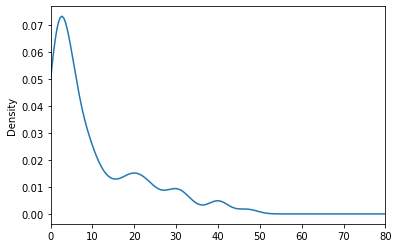

In [80]:
age_dist = df['age'].value_counts().sort_index()
ax = age_dist.plot.kde(bw_method=.1)
ax.set_xlim(0,80);

### GroupBy 객체 생성

```
df.groupby(keys, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
```

`df.groupby()`는 하나 이상의 변수 값을 기준으로 자료를 나누고, `GroupBy` 객체를 생성한다.

기준 변수가 하나일 경우에는 column의 이름을, 두 개 이상일 경우에는 list로 만들어 사용한다.

![](groupby.png)

이 `GroupBy` 객체는 MultiIndex를 이용해 정리되어 있다.

gender<br>(level 0) | index <br> (level 1) | value
:--|:--:|--:
"female" | 0 | 29.0
 | 2 | 2.0
 ...||
 "male" | 1 | 0.9167
  | 3 | 30.0000
 ... ||

`df.groupby("sex")`에서 필요한 column을 추출하려면 `df.groupby("sex").column_name`과 같은 통상적인 DataFrame slicing 방법을 사용한다.

In [81]:
#list(df.iloc[:4,:].groupby("sex").age)

#### 외부의 key를 이용한 객체 생성

- 자료에서 유도할 수 없는 특성을 이용하여 분류할 수 있다. 기준을 만들어 열 이름 대신 사용한다.

In [82]:
external_keys = np.array(["humpty", "dumpty"])
values = np.random.randint(0,2, len(df))
keys = external_keys[values]

list(df.groupby(keys))

[('dumpty',
        survived  pclass     sex      age  sibsp  parch      fare embarked
  1            1       1    male   0.9167      1      2  151.5500        S
  3            0       1    male  30.0000      1      2  151.5500        S
  4            0       1  female  25.0000      1      2  151.5500        S
  5            1       1    male  48.0000      0      0   26.5500        S
  8            1       1  female  53.0000      2      0   51.4792        S
  ...        ...     ...     ...      ...    ...    ...       ...      ...
  1295         0       3    male  27.0000      1      0   14.4542        C
  1297         0       3    male  45.5000      0      0    7.2250        C
  1298         0       3    male  29.0000      0      0    7.2250        C
  1301         0       3  female  22.0000      1      0   14.4542        C
  1302         0       3    male  26.5000      0      0    7.2250        C
  
  [651 rows x 8 columns]),
 ('humpty',
        survived  pclass     sex   age  sibsp 

### 자료의 분할

- `groupBy.groups`는 사전형 자료로 구분에 사용한 변수의 값을 key로 사용한다.

- `df.groupby("embarked").groups`는 전체 자료를 embarked의 값으로 구분하여 embarked의 값을 key로하는 dict를 만든다. dict 이므로 dict에 정의된 attributes와 methods를 사용할 수 있다.

```python
df.groupby("embarked").groups.keys()
df.groupby("embarked").groups.values()
```

In [83]:
print(type(df.groupby("embarked").groups))  # a dictionary

df.iloc[:10,:].groupby("embarked").groups

<class 'pandas.io.formats.printing.PrettyDict'>


{'C': [9], 'S': [0, 1, 2, 3, 4, 5, 6, 7, 8]}

In [84]:
df.iloc[:10,:].groupby(["embarked","pclass"]).groups

{('C', 1): [9], ('S', 1): [0, 1, 2, 3, 4, 5, 6, 7, 8]}

- `get_group()` method는 선택한 group의 자료를 `pd.DataFrame`으로 분리한다.

In [85]:
df.groupby("embarked").get_group("S").head() # df.loc[df["embarked"] == "S"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


- df.groupby(key_variables): key_variables를 index로 하는 DataFrame
- df.groupby(key_variables).groups: key_variables를 key로 하는 dict
- df.groupby(key_variables).get_group(key_value): key_variables로 분류한 자료에서 key_value 해당 자료를 DataFrame으로 정리

### GroupBy 의 활용

- `pd.DataFrame`에 정의된 attritbutes와 methods는 대부분 GroupBy객체에 사용할 수 있다. 이를 이용하면 자료의 선택, 삭제, 변환, 통계량 계산, 기본적인 시각화작업을 할 수 있다.

#### Aggreation

- 각 group의 기초통계량을 계산할 때는 `df.agg(args, *args, **kwargs)`를 사용한다.
 - string function name
 - function
 - list of functions
 - dict of column names $\rightarrow$ functions (or list of functions)

In [86]:
print(df.groupby(["embarked"])["age"].mean())
print(df.groupby(["embarked"])["age"].agg(np.mean))
print(df.groupby(["embarked"])["age"].agg("mean"))

embarked
C    31.466233
Q    26.950820
S    29.100383
Name: age, dtype: float64
embarked
C    31.466233
Q    26.950820
S    29.100383
Name: age, dtype: float64
embarked
C    31.466233
Q    26.950820
S    29.100383
Name: age, dtype: float64


In [87]:
df.groupby(["embarked"])["age"].agg([np.mean, "std"])

,mean,std
embarked,,
C,31.466233,14.062061
Q,26.950820,10.080340
S,29.100383,13.150196


In [88]:
df.groupby(["embarked"]).agg({"age": "mean",       # find the sum of the durations for each group
                              "pclass": "median"})    # find the number of network type entries

,age,pclass
embarked,,
C,31.466233,1.0
Q,26.950820,3.0
S,29.100383,3.0


In [89]:
df.groupby(["embarked"])[["age", "fare"]].agg(lambda x: max(x) - min(x))

,age,fare
embarked,,
C,70.5833,508.3167
Q,68.5000,83.2500
S,79.8333,259.8292


#### transformation

- Transformation은 column-specific한 연산을 적용하며, 입력과 동일한 크기, 동일한 index 를 사용한 결과를 return한다.

```python
DataFrame.transform(func, *args, **kwargs)
```

In [90]:
df.groupby("embarked").transform(lambda x: x - x.mean()).head()

C:\Users\K5\AppData\Local\Temp/ipykernel_172724/3695596813.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.groupby("embarked").transform(lambda x: x - x.mean()).head()


,survived,pclass,age,sibsp,parch,fare
0,0.667396,-1.347921,-0.100383,-0.550328,-0.426696,183.590269
1,0.667396,-1.347921,-28.183683,0.449672,1.573304,123.802769
2,-0.332604,-1.347921,-27.100383,0.449672,1.573304,123.802769
3,-0.332604,-1.347921,0.899617,0.449672,1.573304,123.802769
4,-0.332604,-1.347921,-4.100383,0.449672,1.573304,123.802769


#### aggregate, tranform, and apply

`GroupBy.apply(func, *args, **kwargs)` <br>
Apply function group-wise and combine the results together.

GroupBy.agg: $\mathbb{R}^n \longrightarrow \mathbb{R}$ <br>
GroupBy.transform: $\mathbb{R}^{m+n} \longrightarrow \mathbb{R}^{m+n}$ <br>
GroupBy.apply: $\mathbb{R}^{m+n} \longrightarrow \mathbb{R}^{k+l}$

In [91]:
df.groupby(["embarked"]).agg(lambda x: x.max() - x.mean())
df.groupby(["embarked"]).transform(lambda x: x - x.mean()).head()
df.groupby(["embarked"])[["age"]].apply(lambda x: x - x.mean()).head()
# broadcasting: (n,2) - (1,2)
df.groupby(["embarked"])[["age","fare"]].apply(lambda x: x - x.mean()).head()
df.groupby(["embarked"])[["age","fare"]].apply(lambda x: x - x.mean().mean()).head()

C:\Users\K5\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
C:\Users\K5\AppData\Local\Temp/ipykernel_172724/197912864.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.groupby(["embarked"]).transform(lambda x: x - x.mean()).head()


,age,fare
0,0.576193,182.913693
1,-27.507107,123.126193
2,-26.423807,123.126193
3,1.576193,123.126193
4,-3.423807,123.126193


## pd.pivot, pd.pivot_table, pd.crosstab

- python에서 pivot table을 만들 때는 `pd.pivot_table()`이나 `pd.crosstab()` 함수를 사용한다. 이 두 함수는 거의 동일


- `pd.pivot_table()`이 DataFrame을 input으로 `pd.crosstab()`은 array를 input으로 사용
  - `DataFrame`으로 작업할 때는 `pivot_table`, `Series`로 간단하게 그릴 때는 `crosstab`


- 자료를 요약할 때 흔히 사용한다.

```python
df.pivot(index=None, columns=None, values=None)

pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

df.pivot_table(values=None, index=None, ...)

pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```

### pivoting

`df.pivot`으로 index와 column을 지정하여 새로운 DataFrame을 생성할 수 있다.<br>
연산결과를 이용하여 표를 만들려면 `pd.pivot_table`이나 `pd.crosstab`을 사용핟다.

```
DataFrame.pivot(index=None, columns=None, values=None)
```

In [92]:
df_pivot = pd.DataFrame([])
df_pivot['date'] = np.resize(np.arange('2021-01', '2021-03', dtype='datetime64[M]'), 6,)
df_pivot['item'] = np.array(list('AABBCC'))
df_pivot['sales'] = np.random.randint(8, 20, len(df_pivot.date))

df_pivot

,date,item,sales
0,2021-01-01,A,9
1,2021-02-01,A,11
2,2021-01-01,B,13
3,2021-02-01,B,8
4,2021-01-01,C,13
5,2021-02-01,C,11


In [93]:
df_pivot.pivot(index='date', columns='item', values='sales')

item,A,B,C
date,,,
2021-01-01,9,13,13
2021-02-01,11,8,11


In [94]:
random_df = pd.DataFrame({'A':np.random.randint(1,5,4), 'B':np.random.randint(1,15,4), 'C':np.random.randint(1,15,4)})
print(random_df)
random_df.pivot('A', 'B', 'C')

   A  B   C
0  1  2   7
1  1  4  12
2  4  8   4
3  3  1   7


B,1,2,4,8
A,,,,
1,NaN,7.0,12.0,NaN
3,7.0,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0


In [95]:
print(pd.pivot_table(df, index="sex"))
print('\n\n')
print(pd.pivot_table(df, index="embarked", columns = "sex"))

              age       fare     parch    pclass     sibsp  survived
sex                                                                 
female  28.270159  46.135125  0.637149  2.157667  0.656587  0.727862
male    30.001287  26.496624  0.248219  2.374109  0.414489  0.191211



                age                  fare                parch            \
sex          female       male     female       male    female      male   
embarked                                                                   
C         31.433628  31.489851  81.128540  48.869662  0.513274  0.269231   
Q         23.635593  30.055556  12.632207  12.273941  0.135593  0.095238   
S         27.981386  29.623060  39.339305  22.332635  0.786942  0.258427   

            pclass               sibsp            survived            
sex         female      male    female      male    female      male  
embarked                                                              
C         1.646018  2.006410  0.504425  0.326923  0

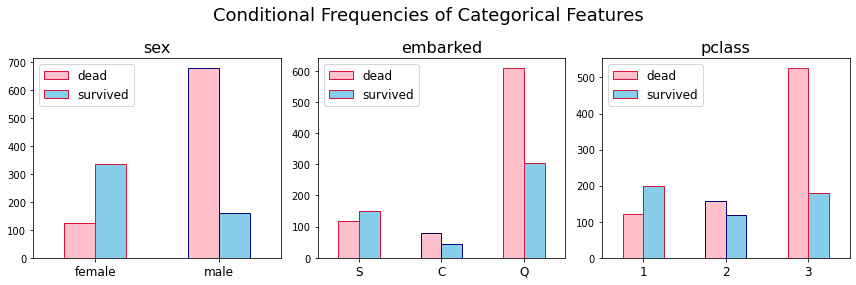

In [96]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax = ax.flatten()

categorial_variables = ['sex', 'embarked', 'pclass']
y = df.survived

for i, feature in enumerate(categorial_variables):
    
    frequency_table = pd.pivot_table(df, index = y.astype(int), values = "age",
                                     columns = feature, aggfunc="count").T
    frequency_table.plot(kind="bar", ax=ax[i], 
                         color=["pink", "skyblue"], edgecolor=["crimson", "navy"])
    ax[i].set_xticklabels(df[feature].unique(), rotation=0, fontsize=12)
    ax[i].legend(["dead", "survived"], fontsize=12)
    ax[i].set_xlabel("")
    ax[i].set_title(feature, fontsize=16)
    
plt.suptitle("Conditional Frequencies of Categorical Features", fontsize=18)
plt.tight_layout()